# Small Basket Sales Forecasting


# Business case
Forecasting is important here to know just the right amount of items to stock.
If perishable items are overstocked then the company will be in loss also if popular items are understocked this will leave customers unhappy and they could lose customers. 
Different location people have different tastes. So, forecasting can help small basket to manage the units of items to stock


# ML Problem Statement
A model that could accurately forecast item sales for small basket. So that small basket would have right number of items at right time across several location and product categories.

# Data Exploration

In [14]:
#importing packages
import pandas as pd # data preprocessing
import numpy as np # linear algebra
import matplotlib.pyplot as plt #Basic plots visualisations
%matplotlib inline
import seaborn as sns #for prettier plots
import os
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# changing working directory
os.chdir('/content/drive/My Drive/PHD_Exam/Datasets')
os.getcwd()

'/content/drive/My Drive/PHD_Exam/Datasets'

In [0]:
# Reading data with memory optimization and droping duplicates
train = pd.read_csv('train.csv',parse_dates=['date'], dtype={ 'unit_sales':np.float32}).drop_duplicates(keep='first')
items = pd.read_csv('item_details.csv',dtype={'perishable':np.int32})
location = pd.read_csv('location_details.csv',dtype={'cluster':np.int32})
transaction = pd.read_csv('train_transactions.csv',parse_dates=['date'], dtype={ 'transactions':np.int32}).drop_duplicates(keep='first') #1 duplicate is present
# renaming location_id in all datasets
train = train.rename(columns = {'locationId': 'location_id'})
transaction = transaction.rename(columns={'location_identifier':'location_id'}) 

In [0]:
# function to understand data
def summary(data):
    print('Number of Rows:',data.shape[0],'\nNumber of Columns:',data.shape[1])
    return(pd.DataFrame({'Datatype':data.dtypes ,
                       'NUll Values':data.isnull().sum(),
                       'Unique values':data.nunique()}))

In [0]:
summary(items)

Number of Rows: 4100 
Number of Columns: 4


,Datatype,NUll Values,Unique values
item_id,object,0,4100
category_of_item,object,0,30
class,object,0,337
perishable,int32,0,2


- **There are 4100 unique Items offered by small basket, Which comes in 30 categories, 337 classes and perishable or not perishable**

In [0]:
summary(location)

Number of Rows: 54 
Number of Columns: 5


,Datatype,NUll Values,Unique values
location_id,object,0,54
city,object,0,22
state,object,0,13
type,object,0,5
cluster,int32,0,17


- **Location_id is Id of Dispatch Centre. There are 54 unique location_id and cities are 22. This mean there are multiple dispatch centres(location_id) for some cities. It will be good to know which city has most number of dispatch centres**
- **The Dispatch Centres(location id) are divided into 5 Types(A,B,C,D,E) and 17 Clusters**

In [0]:
summary(transaction)

Number of Rows: 71390 
Number of Columns: 3


,Datatype,NUll Values,Unique values
date,datetime64[ns],0,1454
location_id,object,0,53
transactions,int32,0,4912


In [0]:
summary(train)

Number of Rows: 101678734 
Number of Columns: 5


,Datatype,NUll Values,Unique values
date,datetime64[ns],0,1456
location_id,object,0,53
item_id,object,0,3890
unit_sales,float16,0,13662
onpromotion,object,21657651,2


- **The train dataset consists of unit sales information from 1jan 2015 to 31dec 2018**
- **location_52 is missing from train and train_transactions data.** 
- **There are 4100 unique items offered by small basket, among those 3890 have been purchased atleast one time, Remaining 210 have not been purchased even a single time from 2015 to 2018** 
- **onpromotion is the only column with Null values**

In [0]:
train_unique_date=train.date.unique()
train_trans_unique_date=transaction.date.unique()
set(train_unique_date) -set(train_trans_unique_date)

{numpy.datetime64('2018-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-01-03T00:00:00.000000000')}

- **2018-1-1 and 2018-1-3 are two days with No transactions**

# Merging Datasets

In [0]:
#df = pd.merge(train,location , on='location_id')

In [0]:
#df = pd.merge(df,items,on='item_id')
# Pickle the merged file 
#outfile = open("file.pkl",'wb')
#pickle.dump(df, outfile)

In [0]:
infile = open('file.pkl','rb')
df=pickle.load(infile)

In [0]:
summary(df)

Number of Rows: 101678734 
Number of Columns: 12


## Total Unit Sales By Date
- How is the distribution of sales over the years. is it increasing, decreasing or stagnant? 

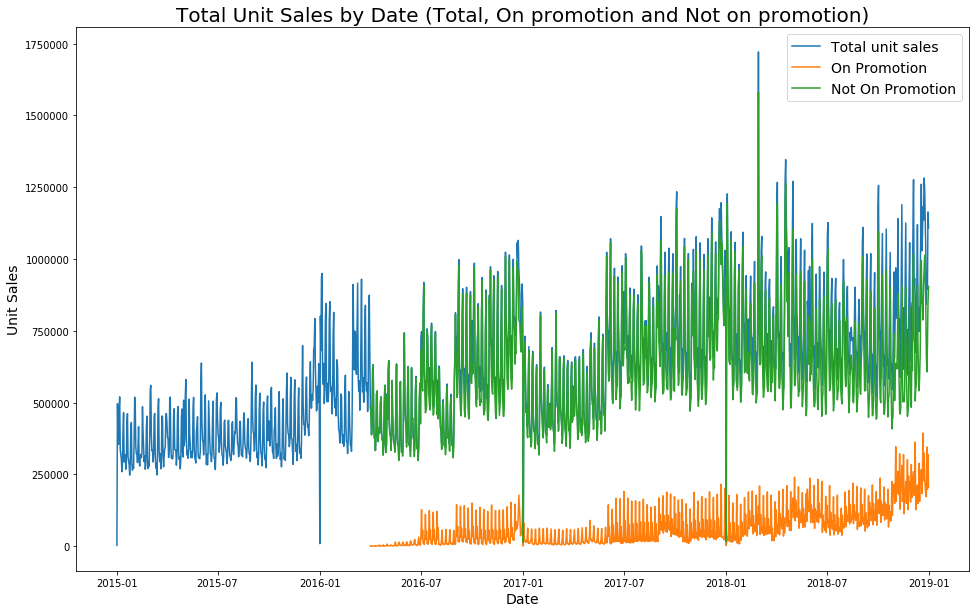

In [0]:
df_plot = train.groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index() # sum of unit sales date wise
plt.figure(figsize=(16,10))#plot size
plt.title('Total Unit Sales by Date (Total, On promotion and Not on promotion)', fontsize=20) #Create the plot title
# Plot total unit sales
plt.plot(df_plot.date, df_plot.unit_sales)
# plot unit sales on promotion
df_plot = train.loc[train['onpromotion'] == True].groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index() #sum of sales by Onpromotion
plt.plot(df_plot.date, df_plot.unit_sales)
# plot unit sales not on promotion
df_plot = train.loc[train['onpromotion'] == False].groupby(by=['date']).agg({'unit_sales':'sum'}).reset_index()#sum of sales by Not On Promotion
plt.plot(df_plot.date, df_plot.unit_sales)

plt.legend(['Total unit sales','On Promotion','Not On Promotion'], fontsize=14)# Set the legend

# Set the labels
plt.xlabel('Date',fontsize=14)
plt.ylabel('Unit Sales',fontsize=14)
plt.show()

- **There is a growth in sales over the years may be this is beacuse of company's growth and awareness among people.** 
- **Every year on 1st jan there is drop in sales.**
- **promotion were implemented from 2016-4. That explain why there are missing values before 2016-4. we will explore more in next plot.**
- **There is also an unexpected spike increase in sales around 2018 febraury**

## Number of records by Onpromotion
- Why are there missing values in Onpromotion Column?

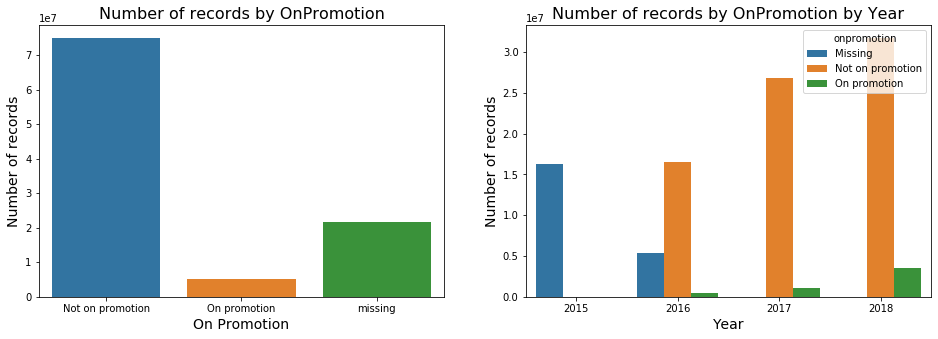

In [0]:
# filling Na in promotion as missing. Na is only present in onpromotions column
df_plot = train.fillna('missing').groupby(by=['onpromotion']).agg({'item_id':'count'}).reset_index() 
# Replace the numeric values with text (for plot readability)
df_plot.onpromotion = df_plot.onpromotion.replace({0:'Not on promotion', 1:'On promotion'})

# Set the plot size
plt.figure(figsize=(15,5))

# Create the barplot
plt.subplot(121); sns.barplot(data=df_plot, x='onpromotion', y='item_id')

# Set the plot title
plt.title('Number of Items by OnPromotion', fontsize=16)

# Set the axes labels
plt.xlabel('On Promotion', fontsize=14)
plt.ylabel('Number of Items', fontsize=14)

df_plot = train.fillna(-1).groupby(by=[train.date.dt.year, 'onpromotion']).agg({'item_id':'count'}).reset_index()

# Replace the numeric values with text (for plot readability)
df_plot.onpromotion = df_plot.onpromotion.replace({0:'Not on promotion', 1:'On promotion', -1: 'Missing'})

#plt.figure(figsize=(16,6))
plt.subplot(122); sns.barplot(data=df_plot, x='date', y='item_id', hue='onpromotion')
plt.title('Number of Items by OnPromotion by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Items', fontsize=14)
plt.show()

- **More items sold are Not on promotion.**
- **Missing data is because promotion were not implemented untill 1st quarter of 2016.**
- **Number of Onpromotion items are increasing over the years. This could also be one of the reasons for increase in sales**



# Total Sales Monthwise for Each year
- How is the sales for each month in consecutive year?
- which month usually have most sales?
- which month have least sales?

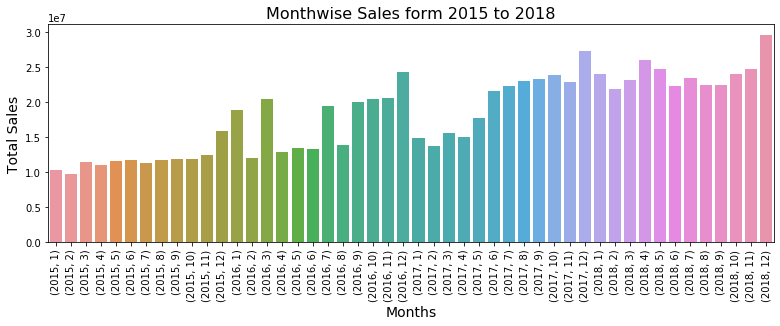

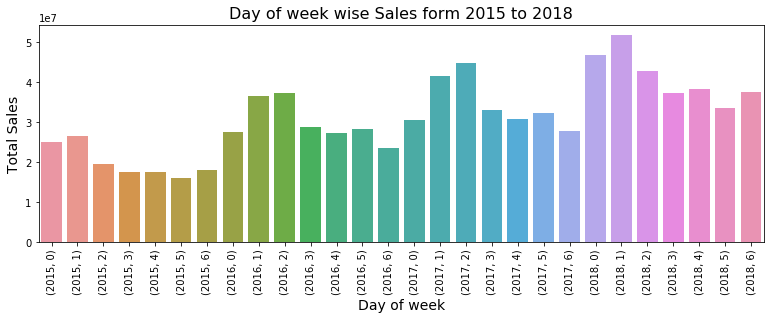

In [13]:
# plot for monthwise sales sum from 2015 to 2018
plt.figure(figsize=(13,4))
df_plot=train.groupby([train.date.dt.year,train.date.dt.month])['unit_sales'].sum()
sns.barplot(x=df_plot.index,y=df_plot.values)
plt.title('Monthwise Sales form 2015 to 2018',fontsize=16)
plt.xlabel('Months',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

#plot for dayofweek sales sum from 2015 to 2018
plt.figure(figsize=(13,4))
df_plot=train.groupby([train.date.dt.year,train.date.dt.dayofweek])['unit_sales'].sum()
sns.barplot(x=df_plot.index,y=df_plot.values)
plt.title('Day of week wise Sales form 2015 to 2018',fontsize=16)
plt.xlabel('Day of week',fontsize=14)
plt.ylabel('Total Sales',fontsize=14)
plt.xticks(rotation='vertical')
plt.show()


- **Over the years there is increase in sales for each month.**
- **December has most sales through each year likely because of christmas**
- **Febraury has least sales through each year** 
- **Day of week sales have interesting pattern. There is increase in sales when week starts and decrease during week ends.** 

## Number Of Stores and Items Category Analysis
- Is number of stores increasing per year or not?
- Which Category has more number of items?
- How many perishable and non perishable items are there?

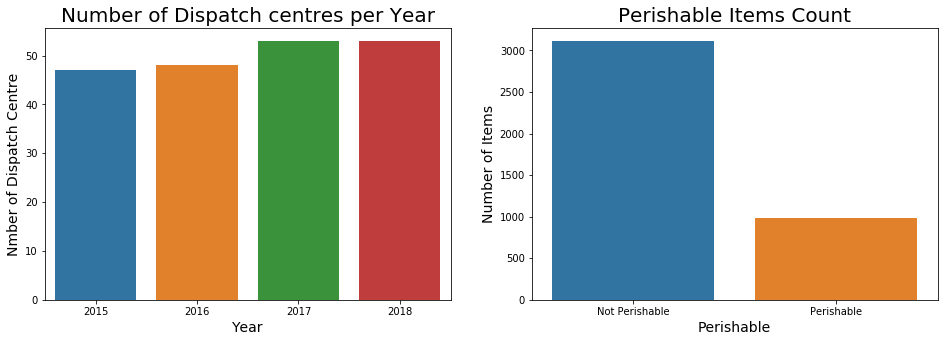

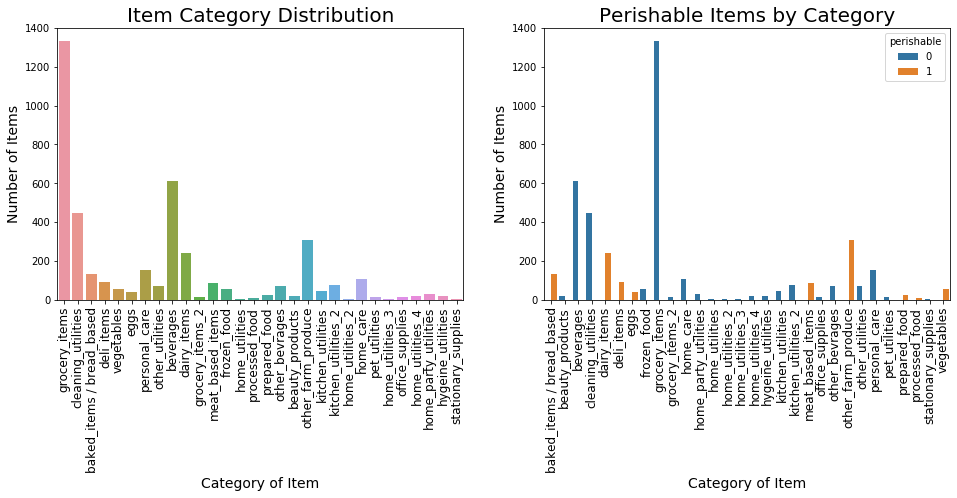

In [8]:
#plot for unique locationid year wise
df_plot = train.groupby(train.date.dt.year)['location_id'].nunique().reset_index()
#Set the plot figure
plt.figure(figsize=(16,5))
plt.subplot(121); sns.barplot(data=df_plot, x='date', y='location_id')
plt.title('Number of Dispatch centres per Year', fontsize=20)# Create the plot title
plt.xlabel('Year', fontsize=14)# setting labels
plt.ylabel('Nmber of Dispatch Centre', fontsize=14)

df_plot=items.perishable.map({1:'Perishable',0:'Not Perishable'})
plt.subplot(122); sns.countplot(df_plot)
plt.title('Perishable Items Count', fontsize=20)
plt.xlabel('Perishable', fontsize=14)# setting labels
plt.ylabel('Number of Items', fontsize=14)
plt.show()

plt.figure(figsize=(16,5))
# countplot for categories( number of items in each category)  
plt.subplot(121); sns.countplot(data=items, x='category_of_item')
# Create the plot title
plt.title('Item Category Distribution', fontsize=20)
plt.xlabel('Category of Item', fontsize=14)# setting labels
plt.ylabel('Number of Items', fontsize=14)
# Rotate the name of the states
plt.xticks(rotation=90, fontsize=12)

#plot for perishable items per category
df_plot = items.groupby(['category_of_item','perishable']).agg({'item_id':'count'}).reset_index()
# Plot the data
plt.subplot(122); sns.barplot(data=df_plot, y='item_id', x='category_of_item', hue='perishable')
# Create the plot title
plt.title('Perishable Items by Category', fontsize=20)
plt.xlabel('Category of Item', fontsize=14)
plt.ylabel('Number of Items', fontsize=14)
# Rotate the name of the states
plt.xticks(rotation=90, fontsize=12)
plt.show()

- **Number of stores are increasing per year. May be this is one of the reason for increase in sales seen in previous plot.**
- **Groceries and Bevarages has more number of items and both are perishable.**
- **As we can see, there are NO Categories that contain BOTH perishable and non-perishable items.This means that the perishable feature is also a feature of the Category and not only of the item.**

## Number of Dispatch Centres by State, City,Cluster and Type
- How many Dispatch Centres are there in each state and each city?
- Which State, city, cluster and Type has most number of dispatch centres?

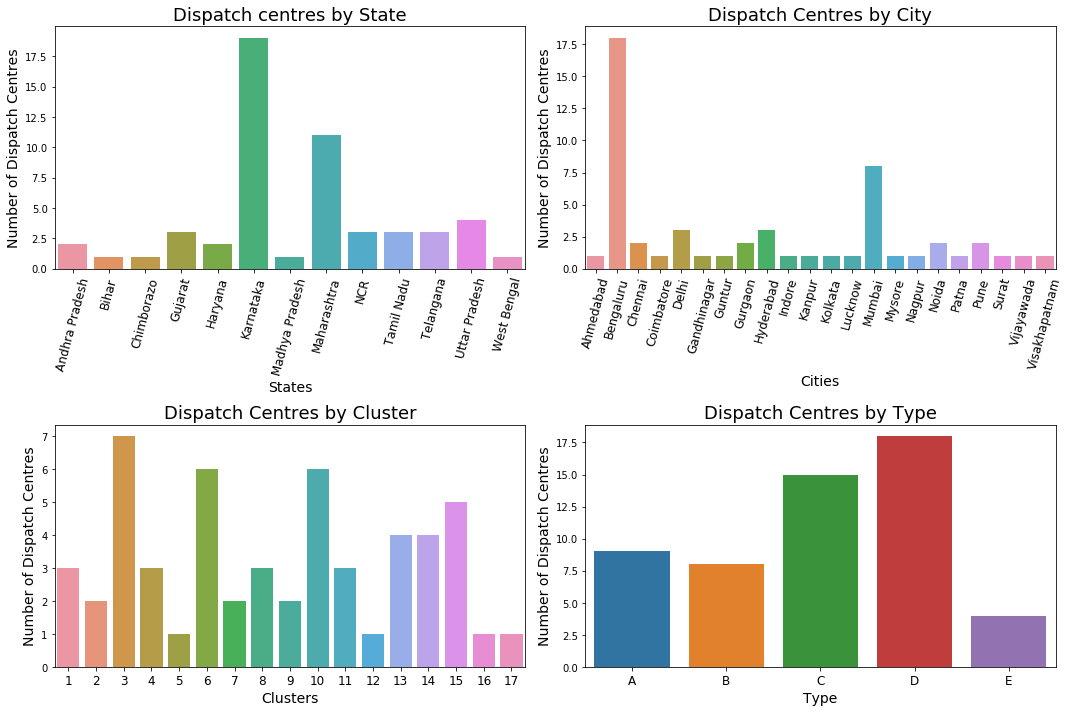

In [7]:
#plot for states
df_plot = location.groupby('state').agg({'location_id':'count'}).reset_index()
plt.figure(figsize=(15,10))# Set the plot size 
plt.subplot(221); sns.barplot(data=df_plot, x='state',y='location_id')# Create the Plot
plt.title('Dispatch centres by State', fontsize=18)# Set the plot title
plt.xlabel('States',fontsize=14)#Set the axis text
plt.ylabel('Number of Dispatch Centres', fontsize=14)
# Rotate the name of the states
plt.xticks(rotation=75, fontsize=12)
#plot for cities
df_plot = location.groupby('city').agg({'location_id':'count'}).reset_index()
# Create the Plot 
plt.subplot(222); sns.barplot(data=df_plot, x='city',y='location_id')
# Set the plot title
plt.title('Dispatch Centres by City', fontsize=18)
#Set the axis text
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Number of Dispatch Centres', fontsize=14)
# Rotate the name of the cities
plt.xticks(rotation=75, fontsize=12)

df_plot = location.groupby('cluster').agg({'location_id':'count'}).reset_index()
# Create the Plot 
plt.subplot(223); sns.barplot(data=df_plot, x='cluster',y='location_id')
# Set the plot title
plt.title('Dispatch Centres by Cluster', fontsize=18)
#Set the axis text
plt.xlabel('Clusters',fontsize=14)
plt.ylabel('Number of Dispatch Centres', fontsize=14)
# Rotate the name of the cities
plt.xticks(fontsize=12)

df_plot = location.groupby('type').agg({'location_id':'count'}).reset_index()
# Create the Plot 
plt.subplot(224); sns.barplot(data=df_plot, x='type',y='location_id')
# Set the plot title
plt.title('Dispatch Centres by Type', fontsize=18)
#Set the axis text
plt.xlabel('Type',fontsize=14)
plt.ylabel('Number of Dispatch Centres', fontsize=14)
# Rotate the name of the cities
plt.xticks( fontsize=12)
plt.tight_layout()
plt.show()

- **States: Karnataka and maharashtra and most number of Dispatch Centres.**
- **Cities: Bengaluru and mumbai has more number of Dispatch Centres.**
- **Cluster: Cluster 3,6 and 10 has more number of dispatch centres**
- **Type: Type D has most number of dispatch centres**

## Total Sales WRT Dispatch centre,City,State,Cluster,Category and Type
- Which City, State, Dispatch Centre, Type, Cluster, Category has highest Total Sales?

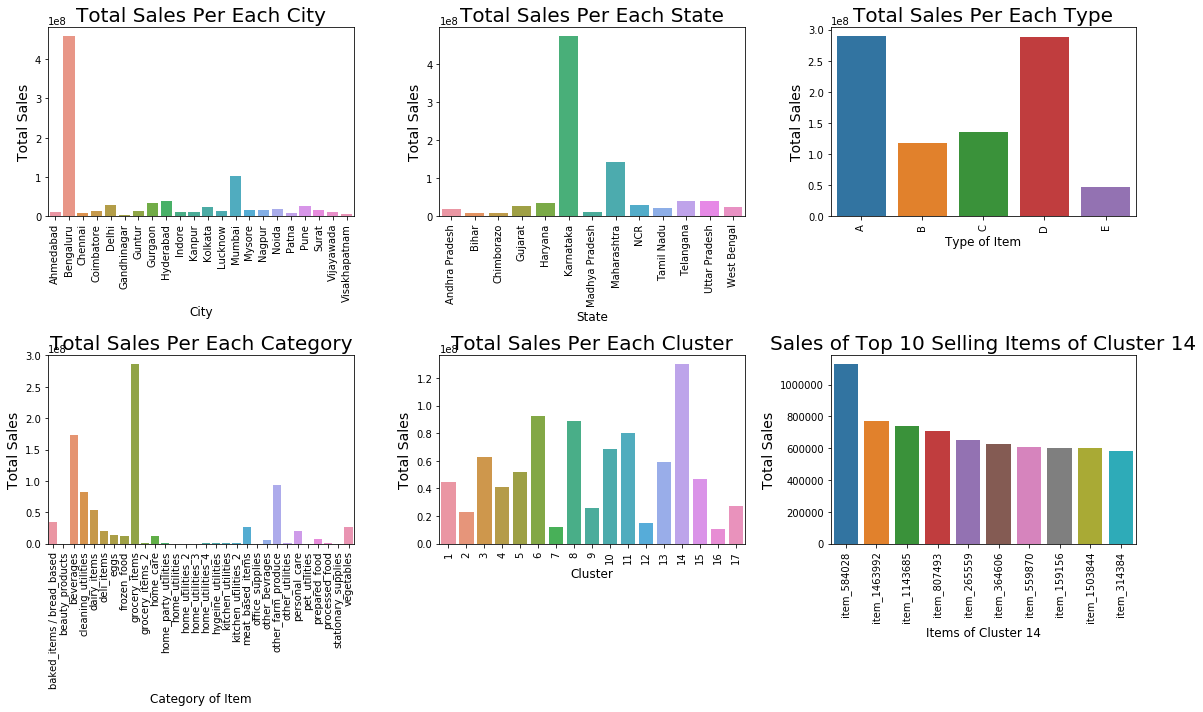

In [0]:
#plot for Total sales wrt item_id
#df_plot = df.groupby('item_id')['unit_sales'].sum()
#plt.subplot(231); sns.barplot(x = df_plot.index ,y=df_plot.values)
#plt.title('Total Sales Per Each Item Id',fontsize=20)
#plt.ylabel('Total Sales',fontsize=14)
#plt.xlabel('Item Id',fontsize=12)
#plt.xticks(rotation=90)

#plot for Total sales City
plt.figure(figsize=(17,10))
df_plot = df.groupby('city')['unit_sales'].sum()
plt.subplot(231); sns.barplot(x = df_plot.index ,y=df_plot.values)
plt.title('Total Sales Per Each City',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('City',fontsize=12)
plt.xticks(rotation=90)

#plot for Total sales wrt state
df_plot = df.groupby('state')['unit_sales'].sum()
plt.subplot(232); sns.barplot(x = df_plot.index ,y=df_plot.values)
plt.title('Total Sales Per Each State',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('State',fontsize=12)
plt.xticks(rotation=90)

#plot for Total sales wrt type
df_plot = df.groupby('type')['unit_sales'].sum()
plt.subplot(233); sns.barplot(x = df_plot.index ,y=df_plot.values)
plt.title('Total Sales Per Each Type',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('Type of Item',fontsize=12)
plt.xticks(rotation=90)

#plot for Total sales wrt category of item
df_plot = df.groupby('category_of_item')['unit_sales'].sum()
plt.subplot(234); sns.barplot(x = df_plot.index ,y =df_plot.values)
plt.title('Total Sales Per Each Category',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('Category of Item',fontsize=12)
plt.xticks(rotation=90)

#plot for Total sales wrt cluster
df_plot = df.groupby('cluster')['unit_sales'].sum()
plt.subplot(235);sns.barplot(x = df_plot.index ,y=df_plot.values)
plt.title('Total Sales Per Each Cluster',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('Cluster',fontsize=12)
plt.xticks(rotation=90)

#plot for Top 10 items of cluster 14 which has most sales
df_plot= df[df.cluster==14].groupby('item_id')['unit_sales'].sum().sort_values(ascending=False)[:10]
plt.subplot(236);sns.barplot(x = df_plot.index ,y=df_plot.values)
plt.title('Sales of Top 10 Selling Items of Cluster 14',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('Items of Cluster 14',fontsize=12)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

#df_plot = df.groupby('class')['unit_sales'].sum()
#plt.subplot(338); sns.barplot(x = df_plot.index ,y=df_plot.values)
#plt.title('Total Sales Per Each Class',fontsize=20)
#plt.ylabel('Total Sales',fontsize=14)
#plt.xlabel('Class of Item',fontsize=12)
#plt.xticks(rotation=90)
#plt.show()


- **Cluster 14 has most sales and it comprises of Dispatch Centres from bangalore and gurgaon. Cluster 3,9 and 10 have more location ID but cluster 14 has more sales** 
- **Total sales in category seems to be directly related to amount of items in that category. Groceries, beverages and cleaning utilities had more items and also more total sales**
- **The Locations of types “A” and “D” are selling the most units. Number of Dispatch centre are almost half in A but A still have same total sales as D.** 

# Total Sales and Total Transaction Per Each Dispatch Centre
- Is total sales directly related to number of number of transactions?
- which Dispatch Centres has most sales? and where are these located? 

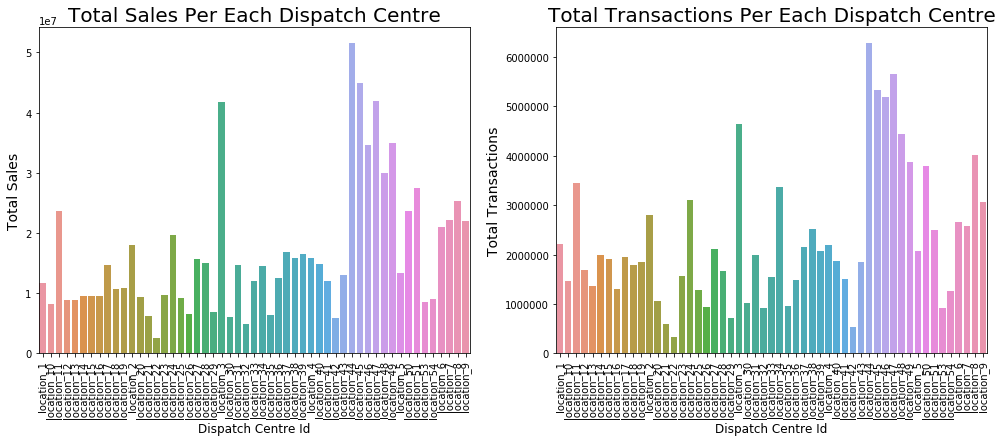

In [0]:
#plot for Total sales wrt LocationID (Dispatch Centre)
plt.figure(figsize=(17,5))
df_plot=train.groupby('locationId')['unit_sales'].sum()
plt.subplot(121); sns.barplot(x = df_plot.index ,y=df_plot.values)
plt.title('Total Sales Per Each Dispatch Centre',fontsize=20)
plt.ylabel('Total Sales',fontsize=14)
plt.xlabel('Dispatch Centre Id',fontsize=12)
plt.xticks(rotation=90)

#plot for Total Transaction wrt LocationId
df_plot = transaction.groupby('location_identifier')['transactions'].sum()
plt.subplot(122); sns.barplot(x=df_plot.index , y=df_plot.values)
plt.title('Total Transactions Per Each Dispatch Centre',fontsize=20)
plt.ylabel('Total Transactions',fontsize=14)
plt.xlabel('Dispatch Centre Id',fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout(pad=1.3)
plt.show()

- **Yes, Total sales are directly related to number of transactions**
- **location_Id(Dispatch Centre ID) 44 to 48 has most sales which is in Bengaluru. so, it is not a surprise that they have more Dispatch Centres in bengaluru.**

# Model Buiding and Feature Engineering
#### I have used two approaches to solve this problem
- First: Standard Machine Learning approach with target encoding
- Second: Time series approach with prophet model with just using past values location_id and item_id wise.


## Standard Machine Learning approach

In [0]:
# Using only 2017 and 2018 data to make model
train = train[train.date.dt.year>2016]
# converting negative unit sales to zero.
train['unit_sales']=train['unit_sales'].apply(lambda x:0 if x<0 else x)
# Merging train and location data on location_id
train =  pd.merge(train,location,on='location_id')
# merging train(merged with location) with item on item_id
train =  pd.merge(train,items,on='item_id')
#Feature engineering : Creating basic feature month,day,weekday,year
train['month']=train.date.dt.month
train['day']=train.date.dt.day
train['weekday']=train.date.dt.weekday
train['year']=train.date.dt.year

In [0]:
train.head()

,date,location_id,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,month,day,weekday,year
0,2018-01-01,location_25,item_105574,12.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,1,1,0,2018
1,2018-01-02,location_25,item_105574,16.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,1,2,1,2018
2,2018-01-03,location_25,item_105574,9.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,1,3,2,2018
3,2018-01-04,location_25,item_105574,4.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,1,4,3,2018
4,2018-01-05,location_25,item_105574,6.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,1,5,4,2018


In [0]:
#Reading test data and performing featuer engineering.
test = pd.read_csv('test.csv',parse_dates=['date'])
test = test.rename(columns = {'locationId': 'location_id'})
test = pd.merge(test,location,on='location_id')
test = pd.merge(test,items,on='item_id')
test = test.iloc[test.id.sort_values().index , :].reset_index(drop=True) # after merging index got changed so sorting by id.
test['month']=test.date.dt.month
test['day']=test.date.dt.day
test['weekday']=test.date.dt.weekday
test['year']=test.date.dt.year
test.head()

,id,date,location_id,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable,month,day,weekday,year
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1067,0,1,1,1,2019
1,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1,1,1,1,2019
2,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0,1,1,1,2019
3,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1092,0,1,1,1,2019
4,4,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1032,0,1,1,1,2019


### Target encoding location_id, item_id, city, type, cluster, weekday,day,  month and year.


In [0]:
for i in [test,train]:
    i['city'] = i['city'].map(train.groupby('city')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['location_id'] = i['location_id'].map(train.groupby('location_id')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['item_id'] = i['item_id'].map(train.groupby('item_id')['unit_sales'].mean())

In [0]:
#for i in [test,train]:
 #   i['state'] = i['state'].map(train.groupby('state')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['type'] = i['type'].map(train.groupby('type')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['cluster'] = i['cluster'].map(train.groupby('cluster')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['day'] = i['day'].map(train.groupby('day')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['weekday'] = i['weekday'].map(train.groupby('weekday')['unit_sales'].mean())

In [0]:
#for i in [test,train]:
 #   i['category_of_item'] = i['category_of_item'].map(train.groupby('category_of_item')['unit_sales'].mean())

In [0]:
for i in [test,train]:
    i['month'] = i['month'].map(train.groupby('month')['unit_sales'].mean())

In [0]:
train['year']=train['year'].map(train[(train.date.dt.month==1) & (train.date.dt.day<16)].groupby(train.date.dt.year)['unit_sales'].sum()/11619407)

In [0]:
# normalized sum of sales in 1st 15days of years
#2017    0.630157
#2018    1.000000
# 2019 sales would be 1+(1-0.630157)
# 2019 1.369843
test['year']=1.369843

In [1]:
#for i in ['location_id','item_id','city','state','type','cluster','class','month','weekday']:
 #   test[i]=test[i].map(train.groupby(i)['unit_sales'].mean())
   # train[i]=train[i].map(train.groupby(i)['unit_sales'].mean())
# this is making session to crash. so doing target encoding seperately

In [0]:
# dropping columns since these are not helping model's performance 
for i in [train,test]:
    i.drop(['date','day','class','category_of_item','state'],axis=1,inplace=True)

In [0]:
test.drop('id',axis=1,inplace=True)

In [0]:
train.head()

,location_id,item_id,unit_sales,onpromotion,city,type,cluster,perishable,month,day,weekday,year
0,5.614084,13.884938,12.0,False,5.614084,7.313727,7.250285,0,8.49194,1,8.871340,1.000028
1,5.614084,13.884938,16.0,False,5.614084,7.313727,7.250285,0,8.49194,2,9.914076,1.000028
2,5.614084,13.884938,9.0,False,5.614084,7.313727,7.250285,0,8.49194,3,8.359913,1.000028
3,5.614084,13.884938,4.0,False,5.614084,7.313727,7.250285,0,8.49194,4,7.592980,1.000028
4,5.614084,13.884938,6.0,False,5.614084,7.313727,7.250285,0,8.49194,5,7.814738,1.000028


In [0]:
test.item_id.fillna(0 , inplace=True)
test.head()

,location_id,item_id,onpromotion,city,type,cluster,perishable,month,day,weekday,year
0,5.614084,3.556780,False,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843
1,5.614084,4.158431,False,5.614084,7.313727,7.250285,1,8.49194,1,9.914076,1.369843
2,5.614084,13.884938,False,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843
3,5.614084,6.474096,False,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843
4,5.614084,5.650304,False,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843


In [0]:
sample = pd.read_csv('sample_submission.csv')
sample.head()

,id,unit_sales
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [0]:
train['onpromotion']=train['onpromotion'].astype('int8')
test['onpromotion']=test['onpromotion'].astype('int8')


In [0]:
test.head()

,location_id,item_id,onpromotion,city,type,cluster,perishable,month,day,weekday,year
0,5.614084,3.556780,0,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843
1,5.614084,4.158431,0,5.614084,7.313727,7.250285,1,8.49194,1,9.914076,1.369843
2,5.614084,13.884938,0,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843
3,5.614084,6.474096,0,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843
4,5.614084,5.650304,0,5.614084,7.313727,7.250285,0,8.49194,1,9.914076,1.369843


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [0]:
x = train.drop('unit_sales',axis=1)
y = train['unit_sales']


In [0]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y , test_size=0.2, random_state=123)

In [ ]:
'''outfile = open('xtrain.pkl','wb')
pickle.dump(xtrain , outfile)
outfile.close()

outfile = open('xtest.pkl','wb')
pickle.dump(xtest , outfile)
outfile.close()

outfile = open('ytrain.pkl','wb')
pickle.dump(ytrain , outfile)
outfile.close()

outfile = open('ytest.pkl','wb')
pickle.dump(ytest , outfile)
outfile.close()'''

In [0]:
dc = DecisionTreeRegressor(max_depth=20)
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

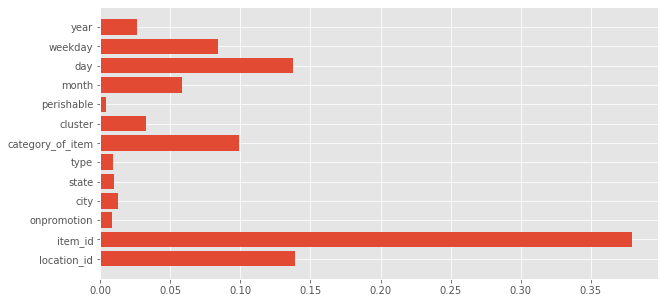

In [116]:
features =['location_id','item_id','onpromotion','city','state','type','category_of_item','cluster','perishable','month','day','weekday','year'] 
plt.figure(figsize=(10,5))
plt.barh(features , dc.feature_importances_)
plt.show()


### Decision tree identified item_id as important feature

In [0]:
outfile = open('Decisiontree20dep.pkl','wb')
pickle.dump(dc , outfile)

In [0]:
from sklearn.metrics import mean_absolute_error
train_pred =dc.predict(xtrain)
test_pred = dc.predict(xtest)
#def mean_absolute_percentage_error(y_true, y_pred): 
 #   y_true, y_pred = np.array(y_true), np.array(y_pred)
  #  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('train_error',mean_absolute_error(ytrain,train_pred))
#print('train_error',mean_absolute_percentage_error(ytrain,train_pred))
print('='*50)
print('validation error', mean_absolute_error(ytest,test_pred))
#print('validation error', mean_absolute_percentage_error(ytest,test_pred))
#best score train: 3.84 val score :4.312

train_error 3.8486033827727737
validation error 4.31297047463446


In [0]:
from xgboost import XGBRegressor
xg = XGBRegressor(max_depth=10,eval_metric='mae')
xg.fit(xtrain,ytrain)

[11:07:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:07:42] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mae', gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

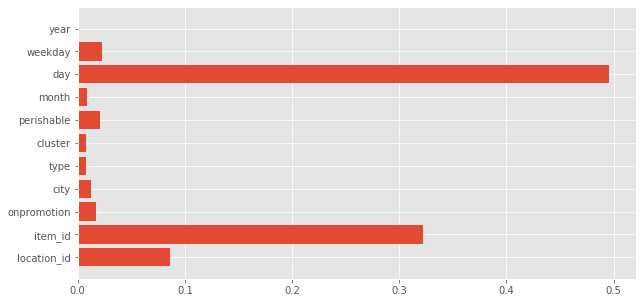

In [124]:
features =['location_id','item_id','onpromotion','city','type','cluster','perishable','month','day','weekday','year']
plt.figure(figsize=(10,5))
plt.barh(features , xg.feature_importances_)
plt.show()

### XBGRegressor identified day and item id  as important features

In [0]:
outfile = open('xgbregressor1.pkl','wb')
pickle.dump(xg , outfile)

In [0]:
from sklearn.metrics import mean_absolute_error
train_pred =xg.predict(xtrain)
test_pred = xg.predict(xtest)
#def mean_absolute_percentage_error(y_true, y_pred): 
 #   y_true, y_pred = np.array(y_true), np.array(y_pred)
  #  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print('train_error',mean_absolute_error(ytrain,train_pred))
#print('train_error',mean_absolute_percentage_error(ytrain,train_pred))
print('='*50)
print('validation error', mean_absolute_error(ytest,test_pred))
#print('validation error', mean_absolute_percentage_error(ytest,test_pred))
#best score train: 3.84 val score :4.312

train_error 4.936760168208973
validation error 4.9321143994301515


### I have trained other models too but including only my best two models in this file. also hyperparameter is chosen based on trail and error. Grid search is computationally expensive so not using it for now.

In [0]:
# making test prediction
t_pred =dc.predict(test)
t_pred

array([ 3.804964 ,  4.2050724, 11.3916025, ...,  4.9467382, 12.623648 ,
        8.6489315], dtype=float32)

In [0]:
sample.shape

(1482295, 2)

In [0]:
len(t_pred)

1482295

In [0]:
sample['unit_sales'] =t_pred 

In [0]:

sample.head()

,id,unit_sales
0,0,4.0
1,1,4.0
2,2,11.0
3,3,5.0
4,4,5.0


In [0]:
sample.to_csv('My_submission.csv',index=False)

## Time Series approach using Prophet
- There are 53 location_id and 3890 item_id so basically we have 3890*53 number of time series.
- so, making model for each time series and appending to a test_pred_df Dataframe. this way i will get all the forecasted values.
- finally merging it with actual test data on location_id,item_id and date.
- if there are any NA values then using best ml model from 1st approach to fill those.

In [0]:
train.head()

,date,location_id,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,False
1,2015-01-01,location_25,item_105574,1.0,False
2,2015-01-01,location_25,item_105575,2.0,False
3,2015-01-01,location_25,item_108079,1.0,False
4,2015-01-01,location_25,item_108701,1.0,False


### Steps i will be doing in this approach (In for loops)

In [0]:
# subsetting data based in location and item
train[(train.location_id=='location_25') & (train.item_id=='item_103665')].head()

,date,location_id,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,False
19811,2015-01-02,location_25,item_103665,5.0,False
100696,2015-01-04,location_25,item_103665,5.0,False
141831,2015-01-05,location_25,item_103665,5.0,False
183815,2015-01-06,location_25,item_103665,7.0,False


In [0]:
# storing it in a temporary data frame to give it as input to prophet model
df = train[(train.location_id=='location_25') & (train.item_id=='item_103665')]

In [0]:
# training date ends at 31st december and forecasting from 1st jan 2019 to 15th jan 2019
df.tail()

,date,location_id,item_id,unit_sales,onpromotion
101197018,2018-12-27,location_25,item_103665,6.0,False
101301681,2018-12-28,location_25,item_103665,5.0,False
101408048,2018-12-29,location_25,item_103665,5.0,False
101515852,2018-12-30,location_25,item_103665,4.0,False
101626118,2018-12-31,location_25,item_103665,2.0,False


In [0]:
# after subsetting using only date and sales as Prophet model takes input as dataframe with two columns. Date as 'ds' and time series as 'y'
df = df[['date','unit_sales']].reset_index(drop=True) 

In [0]:
# getting data ready for prophet
from fbprophet import Prophet
df = df.rename(columns={'date':'ds','unit_sales':'y'})

In [0]:
# training prophet
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# creating test dataframe
future= m.make_future_dataframe(periods=15,freq='d')
future.tail(15)

,ds
974,2019-01-01
975,2019-01-02
976,2019-01-03
977,2019-01-04
978,2019-01-05
979,2019-01-06
980,2019-01-07
981,2019-01-08
982,2019-01-09
983,2019-01-10


In [0]:
# forecasting and using this data to store all test info
forecast = m.predict(future.tail(15))
forecast[['ds','yhat']]
forecast['location_id']='location_25'
forecast['item_id']='item_103665'
test_pred_df=forecast[['ds','yhat','location_id','item_id']]

,ds,yhat,location_id,item_id
0,2019-01-01,5.633753,location_25,item_103665
1,2019-01-02,4.280572,location_25,item_103665
2,2019-01-03,3.901986,location_25,item_103665
3,2019-01-04,4.212692,location_25,item_103665
4,2019-01-05,3.721160,location_25,item_103665
5,2019-01-06,4.405208,location_25,item_103665
6,2019-01-07,4.988915,location_25,item_103665
7,2019-01-08,4.476267,location_25,item_103665
8,2019-01-09,2.990374,location_25,item_103665
9,2019-01-10,2.506984,location_25,item_103665


In [0]:
test.head()

,id,date,location_id,item_id,onpromotion
0,0,2019-01-01,location_25,item_99197,False
1,1,2019-01-01,location_25,item_103665,False
2,2,2019-01-01,location_25,item_105574,False
3,3,2019-01-01,location_25,item_105857,False
4,4,2019-01-01,location_25,item_106716,False


In [ ]:
u_location_id = train.location_id.unique()
u_item_id = train.item_id.unique()
flag=0
for i in u_location_id:
    for j in u_item_id:
    df = train[(train.location_id==i) & (train.item_id==j)]
    df = df[['date','unit_sales']].reset_index(drop=True)
    df = df.rename(columns={'date':'ds','unit_sales':'y'})
    model = Prophet()
    model.fit(df)
    future= m.make_future_dataframe(periods=15,freq='d')
    forecast = m.predict(future.tail(15))
    forecast['location_id']=i
    forecast['item_id']=j
    if(flag==0):
        test_pred_df=forecast[['ds','yhat','location_id','item_id']]
        flag=1
    else:
        test_pred_df = pd.concat([test_pred_df, forecast[['ds','yhat','location_id','item_id']]], ignore_index=True)  
        
# unfortunately this took too long to execute and i have not used this model for submission :(


In [0]:
# merging test_pred_df with test
test_pred_df = test_pred_df.rename(columns={'ds':'date'})
test = pd.merge(test,test_pred_df,on['date','location_id','item_id'])
submission = test['id','yhat']
submission = submission.rename(columns={'yhat','unit_sales'})
submission.to_csv('Prophet_pred.csv',index=False)


# Answering Operations Teams Questions:


- Business units belonging to which cluster will see the highest amount of sales for the first 15 days of 2019?
- What are the top 10 selling items in this cluster?
- What is the rate of purchase per week for these items?


### Business units of which cluster will have highest sales for first 15 days of 2019

In [9]:
test = pd.read_csv('Datasets/test.csv').rename(columns={'locationId':'location_id'})
print(test.shape)
location = pd.read_csv('Datasets/location_details.csv')
test = pd.merge(test,location,on='location_id')
print(test.shape)

(1482295, 5)
(1482295, 9)


In [10]:
submission = pd.read_csv('mysub5.csv')
test = pd.merge(test,submission,on = 'id')
test.head()

,id,date,location_id,item_id,onpromotion,city,state,type,cluster,unit_sales
0,0,2019-01-01,location_25,item_99197,False,Kanpur,Uttar Pradesh,D,1,3.697709
1,1,2019-01-01,location_25,item_103665,False,Kanpur,Uttar Pradesh,D,1,2.942786
2,2,2019-01-01,location_25,item_105574,False,Kanpur,Uttar Pradesh,D,1,10.750000
3,3,2019-01-01,location_25,item_105857,False,Kanpur,Uttar Pradesh,D,1,7.735500
4,4,2019-01-01,location_25,item_106716,False,Kanpur,Uttar Pradesh,D,1,5.315415


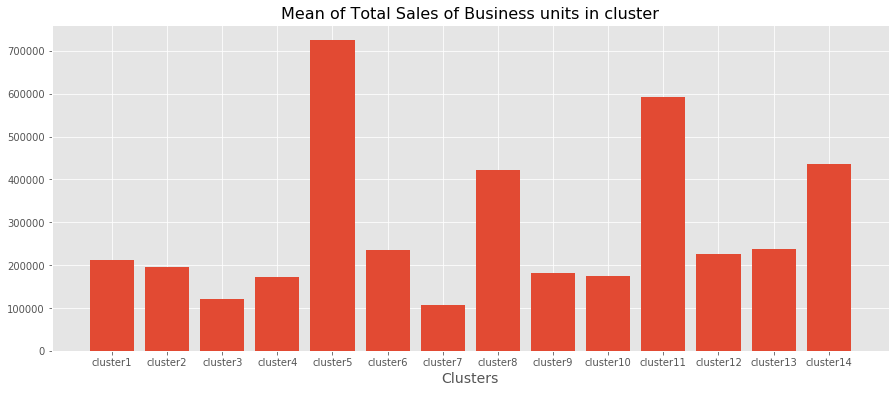

In [103]:
# Mean of total sales of locations in cluster
clus_location ={} 
for i in range(1,15):
    clus_location['cluster{}'.format(i)]=test[test.cluster==i].groupby('location_id')['unit_sales'].sum().mean()
plt.figure(figsize=(15,6))
plt.bar(*zip(*clus_location.items())) 
plt.title('Mean of Total Sales of Business units in cluster',fontsize=16)
plt.xlabel('Clusters',fontsize=14)
plt.show()

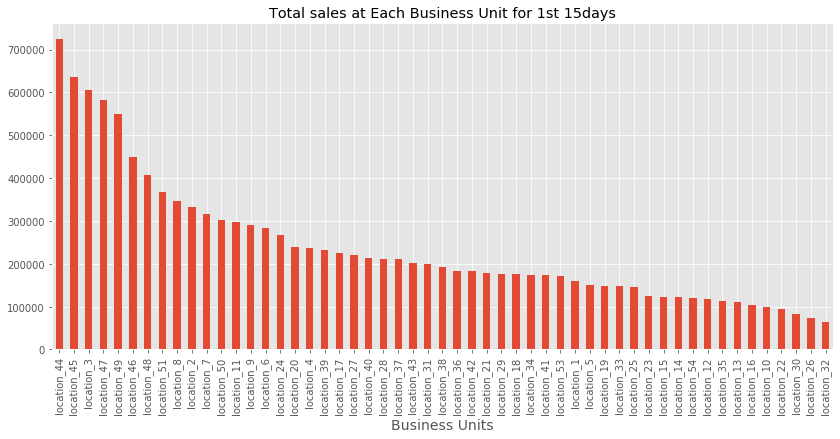

In [16]:
test.groupby('location_id')['unit_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(14,6))
plt.title('Total sales at Each Business Unit for 1st 15days',fontsize=16)
plt.xlabel('Business Units',fontsize=14)
plt.show()

### Business unit belonging to cluster 5 will see the highest sales .Location_44(in cluster 5) will see highest sales in 1st 15 days

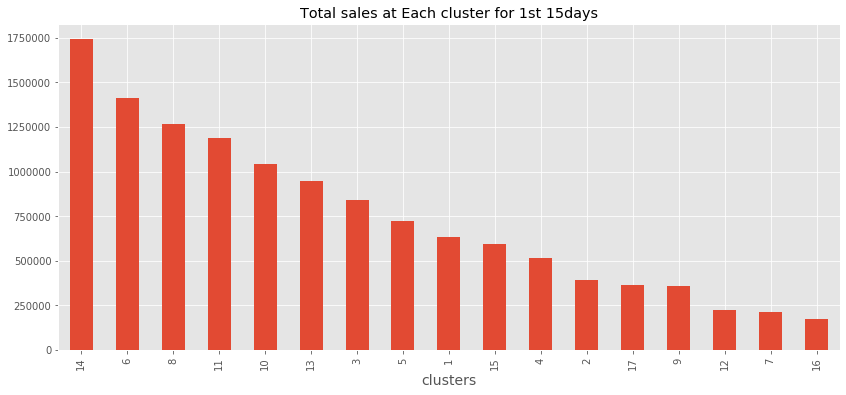

In [105]:
test.groupby('cluster')['unit_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(14,6))
plt.title('Total sales at Each cluster for 1st 15days')
plt.xlabel("clusters",fontsize=14)
plt.show()

### Cluster 14 will have Highest Total sales but business unit from cluster 5 will have highest sales

## Top 10 selling items of Cluster 5

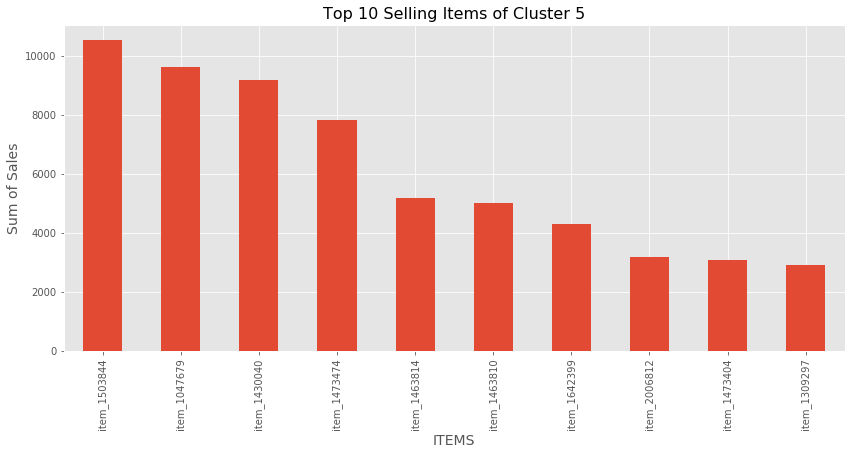

In [106]:
top10_items_clus5=test[test.cluster==5].groupby('item_id')['unit_sales'].sum().sort_values(ascending=False)[:10]
top10_items_clus5.plot.bar(figsize=(14,6))
plt.title('Top 10 Selling Items of Cluster 5',fontsize=16)
plt.ylabel('Sum of Sales',fontsize=14)
plt.xlabel('ITEMS',fontsize=14)
plt.show()

## Rate of purchase per week of these items

In [107]:
test['date']=pd.to_datetime(test['date'])
test.dtypes

id                      int64
date           datetime64[ns]
location_id            object
item_id                object
onpromotion              bool
city                   object
state                  object
type                   object
cluster                 int64
unit_sales            float64
week                    int64
dtype: object

In [108]:
from datetime import datetime
test['week']=test.date.dt.week

In [110]:
for i in top10_items_clus5.index:
    print(f"{i} \n ",test[test.item_id==i].groupby('week')['unit_sales'].sum())

item_1503844 
  week
1    30780.141033
2    42741.242512
3    13510.636729
Name: unit_sales, dtype: float64
item_1047679 
  week
1    21919.557554
2    28203.918425
3     9395.726440
Name: unit_sales, dtype: float64
item_1430040 
  week
1    19714.577534
2    25583.477140
3     8348.492482
Name: unit_sales, dtype: float64
item_1473474 
  week
1    27438.428016
2    35430.827454
3    10584.252346
Name: unit_sales, dtype: float64
item_1463814 
  week
1    19881.225199
2    35738.360251
3    12018.818325
Name: unit_sales, dtype: float64
item_1463810 
  week
1    20730.427360
2    33297.242241
3    10259.489973
Name: unit_sales, dtype: float64
item_1642399 
  week
1    15619.098040
2    22184.214173
3     6077.625939
Name: unit_sales, dtype: float64
item_2006812 
  week
1    6111.950090
2    6977.954302
3    3824.749566
Name: unit_sales, dtype: float64
item_1473404 
  week
1     9220.180240
2    11402.226958
3     3539.669313
Name: unit_sales, dtype: float64
item_1309297 
  week
1     7569

# Rate of purchase of 10 Items in 1st three weeks from 1st jan 2019 to 15th jan 2019